# Exploratory Data analysis on the Zomato restaurant Data,

## Understand customer preferences
## Dining Trends, and Competitive landscape in various regions of India
## Effective Marketing campaign for a restaurant chain.

In [43]:
# importing the libraries required
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')
matplotlib.use('Qt5Agg') 
%matplotlib inline
import seaborn as sns

plt. style.use('ggplot')

# pd. set_option ( 'max_columns',200)

In [44]:
file_path = '/Users/muhammadhassaan/Downloads/csv files/zomato_restaurants_in_India.csv'
df = pd.read_csv(file_path)

## Data Understanding

In [45]:
df['establishment'].unique()

array(["['Quick Bites']", "['Casual Dining']", "['Bakery']", "['Café']",
       "['Dhaba']", "['Bhojanalya']", "['Bar']", "['Sweet Shop']",
       "['Fine Dining']", "['Food Truck']", "['Dessert Parlour']",
       "['Lounge']", "['Pub']", "['Beverage Shop']", "['Kiosk']",
       "['Paan Shop']", "['Confectionery']", '[]', "['Shack']",
       "['Club']", "['Food Court']", "['Mess']", "['Butcher Shop']",
       "['Microbrewery']", "['Cocktail Bar']", "['Pop up']",
       "['Irani Cafe']"], dtype=object)

```Cocktail Bar,  Bar, Microbreweryand,  Beverage Shop are in the same category
similarly Irani Cafe, Café are in the same category its my
analysis helpful for the simple analysis

In [46]:
df['cuisines'].unique()



array(['North Indian, South Indian, Mithai, Street Food, Desserts',
       'North Indian, Mughlai, Rolls, Chinese, Fast Food, Street Food',
       'Fast Food, Mithai', ...,
       'Street Food, Biryani, Chinese, Fast Food, North Indian, Mughlai',
       'North Indian, Chinese, Mexican, Italian, Thai, Continental',
       'North Indian, Lucknowi, Chinese'], dtype=object)

In [47]:
df['address'].unique()

array(['Kalyani Point, Near Tulsi Cinema, Bypass Road, Khandari, Agra',
       'Main Market, Sadar Bazaar, Agra Cantt, Agra',
       '62/1, Near Easy Day, West Shivaji Nagar, Goalpura, Shahganj', ...,
       'Shop 11, Ground Floor, Atlantis K-10, Tower A, Opposite Vadodara Central Mall, Sarabhai Road, Genda Circle, Alkapuri, Vadodara',
       'Mahalaxmi Apartment, Opposite B O B, Karoli Bag, Karelibaug, Vadodara',
       'G-2, Vedant Platina, Near Cosmos, Akota, Vadodara'], dtype=object)

In [48]:
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [49]:
df.shape

(211944, 26)

In [50]:
df.dtypes

res_id                    int64
name                     object
establishment            object
url                      object
address                  object
city                     object
city_id                   int64
locality                 object
latitude                float64
longitude               float64
zipcode                  object
country_id                int64
locality_verbose         object
cuisines                 object
timings                  object
average_cost_for_two      int64
price_range               int64
currency                 object
highlights               object
aggregate_rating        float64
rating_text              object
votes                     int64
photo_count               int64
opentable_support       float64
delivery                  int64
takeaway                  int64
dtype: object

In [51]:
df.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


## Data Preparation

In [52]:
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [53]:
# subset of df I need to explore 
df = df[[ 'name', 'establishment', 'address', 'city', 
       'locality', 'latitude', 'longitude',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'highlights', 'aggregate_rating', 'votes', 'photo_count', 'delivery',
       'takeaway']].copy()

In [54]:

df.loc[df.duplicated(subset=['name','timings'])]

,name,establishment,address,city,locality,latitude,longitude,locality_verbose,cuisines,timings,average_cost_for_two,price_range,highlights,aggregate_rating,votes,photo_count,delivery,takeaway
7,Domino's Pizza,['Quick Bites'],"Plot C-1/6, Sector 13, Sikandra, Agra",Agra,Sikandra,27.203930,77.954260,"Sikandra, Agra","Pizza, Fast Food",10:57 AM to 11 PM,400,2,"['Lunch', 'Delivery', 'Credit Card', 'No Alcoh...",3.8,617,18,-1,-1
11,Bikanervala,['Casual Dining'],"Opposite ITC Mughal, Fatehbad Road, Tajganj, Agra",Agra,Tajganj,27.158549,78.045227,"Tajganj, Agra","North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),700,2,"['Dinner', 'Delivery', 'Breakfast', 'Lunch', '...",4.4,523,162,1,-1
15,Domino's Pizza,['Quick Bites'],"Ground & First Floor, City Mall, Balkeshwar Co...",Agra,Kamla Nagar,27.212943,78.026549,"Kamla Nagar, Agra","Pizza, Fast Food",10:57 AM to 11 PM,400,2,"['Credit Card', 'Dinner', 'Debit Card', 'Takea...",3.5,490,17,-1,-1
26,Pizza Hut,['Casual Dining'],"25, Deepshikha Towers, Sanjay Place, Civil Lin...",Agra,Civil Lines,27.201734,78.007850,"Civil Lines, Agra","Pizza, Fast Food, Italian",11 AM to 11 PM,700,2,"['Dinner', 'No Alcohol Available', 'Lunch', 'D...",3.9,410,61,1,-1
28,Domino's Pizza,['Quick Bites'],"113-116, DC Nand Plaza, 50B Taj Road, Agra Can...",Agra,Agra Cantt,27.163620,78.014850,"Agra Cantt, Agra","Pizza, Fast Food",10:57 AM to 11 PM,400,2,"['Lunch', 'Takeaway Available', 'No Alcohol Av...",3.6,433,26,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211937,Biryani aur Baatein,['Casual Dining'],"Shop 14, Atlantis K-10, A Wing, Genda Circle R...",Vadodara,Alkapuri,22.317746,73.168043,"Alkapuri, Vadodara","Biryani, Mughlai, Chinese","11:30am – 3:30pm, 7:30pm – 1am (Mon-Sun)",500,2,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,154,96,-1,-1
211938,Wok On Fire,['Casual Dining'],"Ground Floor 1, Rossette Building, Opposite Se...",Vadodara,Fatehgunj,22.323357,73.187461,"Fatehgunj, Vadodara","Chinese, Asian",11 AM to 11 PM,1000,3,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,301,126,1,-1
211939,Kali Mirch Cafe And Restaurant,['Casual Dining'],"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,Fatehgunj,22.336931,73.192356,"Fatehgunj, Vadodara",North Indian,"11am – 3pm, 7pm – 11:30pm (Mon-Sun)",600,2,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,243,40,-1,-1
211941,The Grand Thakar,['Casual Dining'],"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,Alkapuri,22.310563,73.171163,"Alkapuri, Vadodara","Gujarati, North Indian, Chinese","11:30 AM to 3:30 PM, 7:30 PM to 11 PM",700,2,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,111,38,-1,-1


In [55]:
df. query('name == ("Dominos Pizza	")')

,name,establishment,address,city,locality,latitude,longitude,locality_verbose,cuisines,timings,average_cost_for_two,price_range,highlights,aggregate_rating,votes,photo_count,delivery,takeaway


Percentages of misisng vals in the datasets

In [56]:
missing_vales = df.isnull().sum() / 100 
missing_vales

name                     0.00
establishment            0.00
address                  1.34
city                     0.00
locality                 0.00
latitude                 0.00
longitude                0.00
locality_verbose         0.00
cuisines                13.91
timings                 38.74
average_cost_for_two     0.00
price_range              0.00
highlights               0.00
aggregate_rating         0.00
votes                    0.00
photo_count              0.00
delivery                 0.00
takeaway                 0.00
dtype: float64

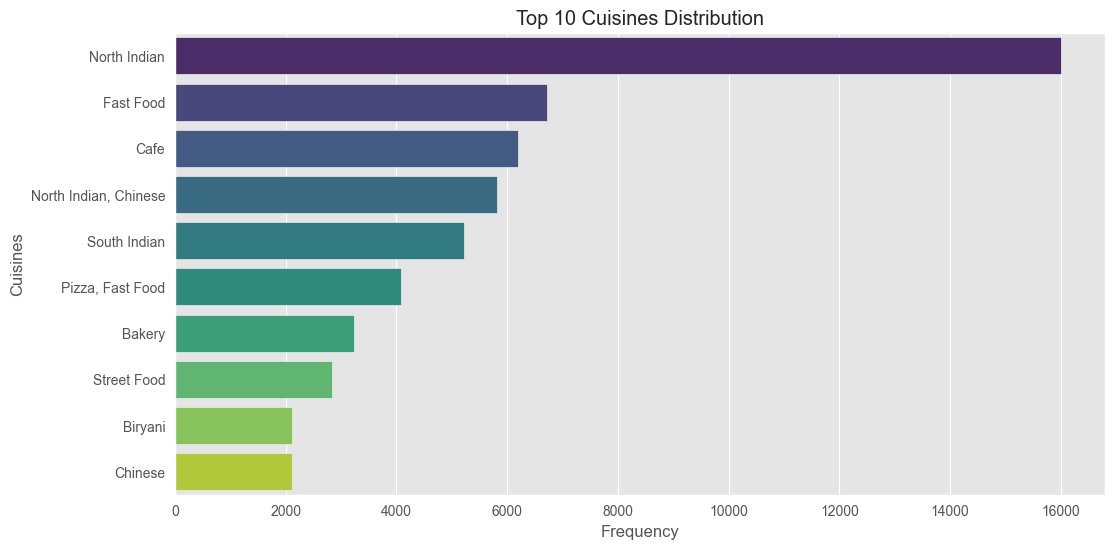

In [57]:
top_cuisines = df['cuisines'].value_counts().nlargest(10) 

plt.figure(figsize=(12, 6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index,palette="viridis")
plt.title('Top 10 Cuisines Distribution')
plt.xlabel('Frequency')
plt.ylabel('Cuisines')

plt.show()

imputationq can work with the following visualization of barplot

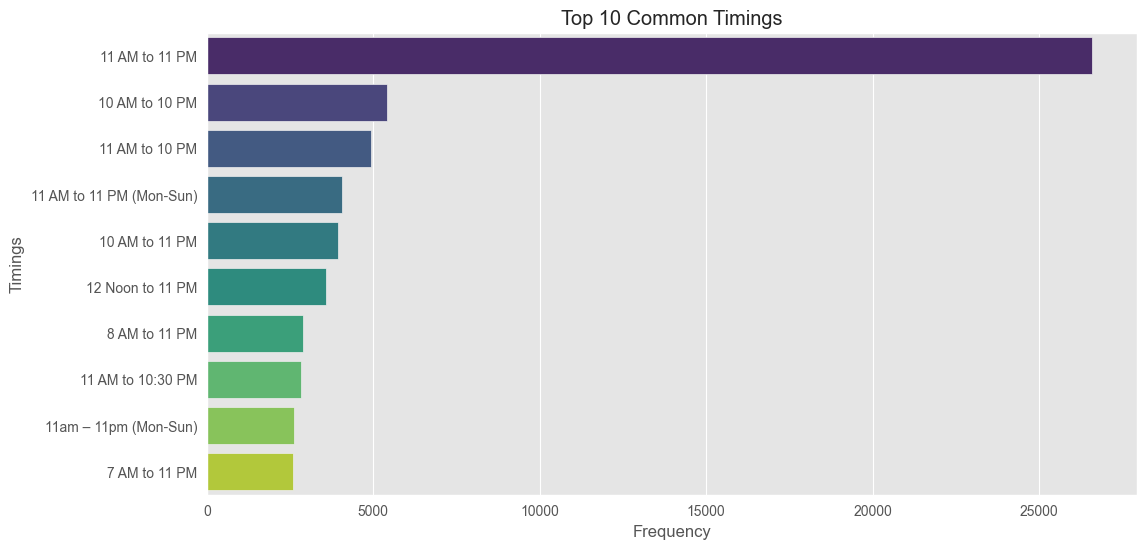

In [58]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='timings', order=df['timings'].value_counts().iloc[:10].index,palette="viridis")
plt.title('Top 10 Common Timings')
plt.xlabel('Frequency')
plt.ylabel('Timings')
plt.show()

its mean we can impute the valies of the top 3 timings in the df frame which vals are missing

- Knowing that 11 AM and 11 PM are peak times, these hours might represent peak dining times
- possibly lunch and dinner rush hours. This can influence staffing, preparation, and promotional activities.

In [59]:
# Missing values handle by the imputation 
top_cuisine = df['cuisines'].value_counts().idxmax() #  idmax =>o find the most common value mode 
df['cuisines'] = df['cuisines'].fillna(top_cuisine) 
top_timing = df['timings'].value_counts().idxmax()
df['timings'] = df['timings'].fillna(top_timing)

## Exploratory Data Analysis 


In [60]:
# Calculate central tendency
mean_val = df['average_cost_for_two'].mean()
median_val = df['average_cost_for_two'].median()
mode_val = df['average_cost_for_two'].mode()[0]

# Calculate measures of dispersion
range_val = df['average_cost_for_two'].max() - df['average_cost_for_two'].min()
variance_val = df['average_cost_for_two'].var()
std_deviation_val = df['average_cost_for_two'].std()
iqr_val = df['average_cost_for_two'].quantile(0.75) - df['average_cost_for_two'].quantile(0.25)

# Calculate shape descriptors
skewness_val = df['average_cost_for_two'].skew()
kurtosis_val = df['average_cost_for_two'].kurt()
print('average_cost_for_two feature')
print()

print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Mode: {mode_val}")
print(f"Range: {range_val}")
print(f"Variance: {variance_val}")
print(f"Standard Deviation: {std_deviation_val}")
print(f"IQR: {iqr_val}")
print(f"Skewness: {skewness_val}")
print(f"Kurtosis: {kurtosis_val}")

average_cost_for_two feature

Mean: 595.8122287019213
Median: 400.0
Mode: 300
Range: 30000
Variance: 367526.16571562004
Standard Deviation: 606.2393633834906
IQR: 450.0
Skewness: 5.4917440859453315
Kurtosis: 112.76140533460676


## Correlation Analysis

In [62]:
# Select only the numerical columns for the correlation matrix
numerical_data = df.select_dtypes(include=['float64', 'int64'])

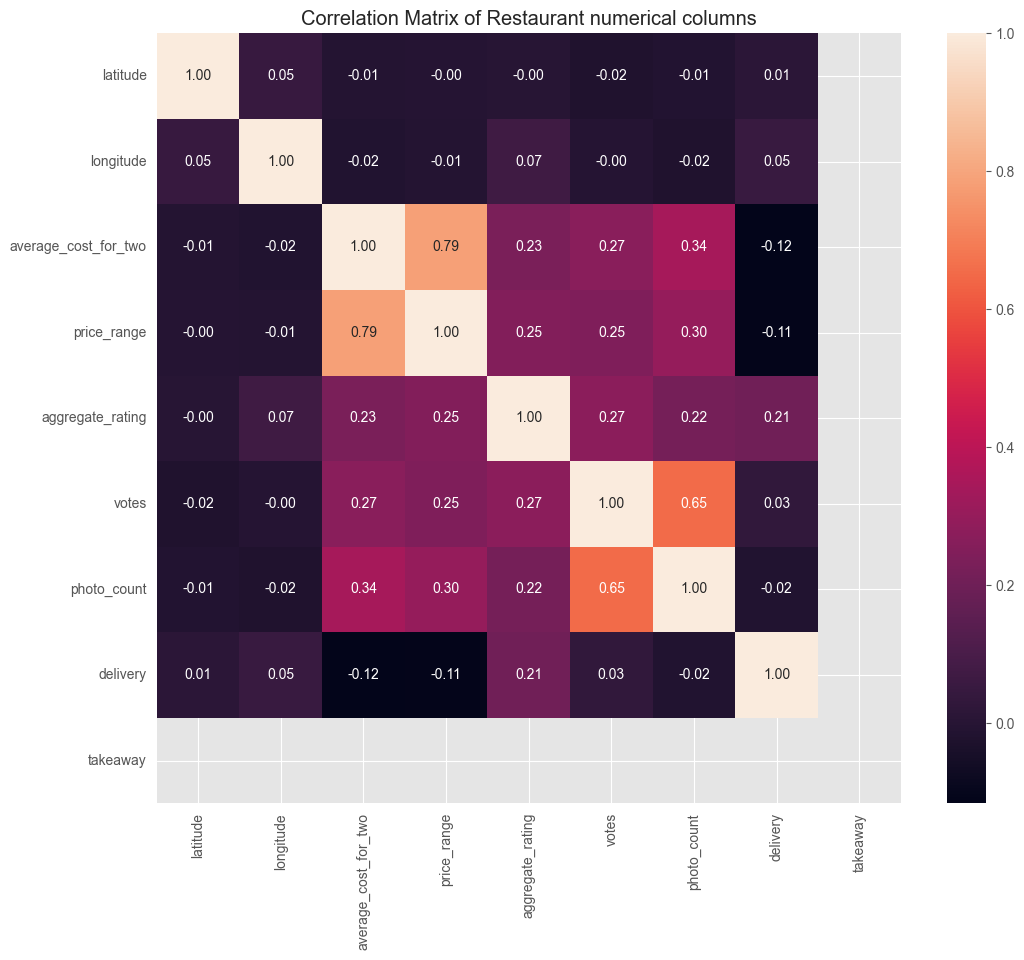

In [63]:
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Restaurant numerical columns')
plt.show()

In [64]:
# Check for missing values
print(df[['aggregate_rating', 'price_range', 'average_cost_for_two']].isnull().sum())
print(df[['aggregate_rating', 'price_range', 'average_cost_for_two']].dtypes)

aggregate_rating        0
price_range             0
average_cost_for_two    0
dtype: int64
aggregate_rating        float64
price_range               int64
average_cost_for_two      int64
dtype: object


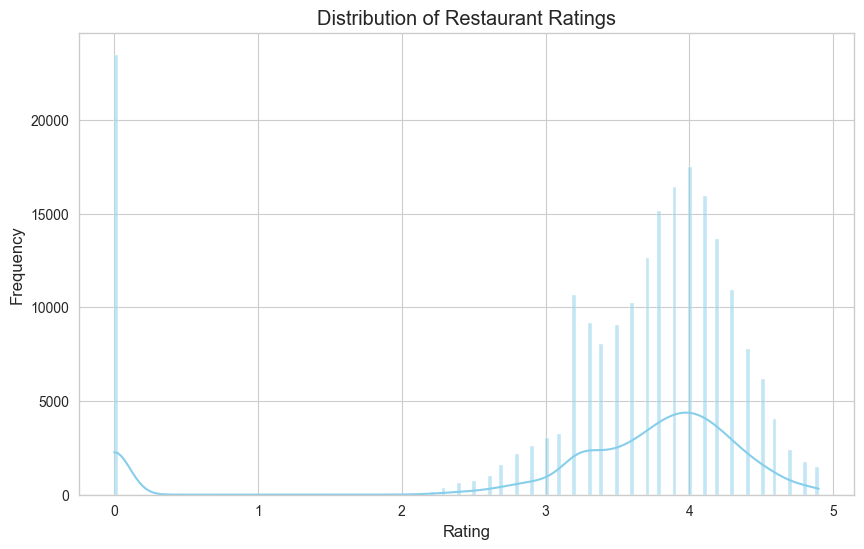

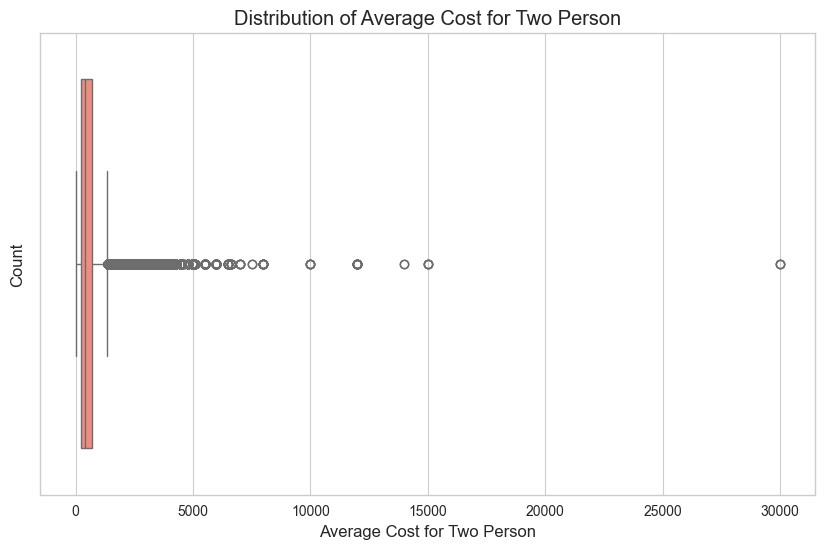

In [65]:
sns.set_style("whitegrid")

# Histogram of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['aggregate_rating'], kde=True, color='skyblue')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


# Boxplot of Average Cost for Two
plt.figure(figsize=(10, 6))
sns.boxplot(x='average_cost_for_two', data=df, color='salmon')
plt.title('Distribution of Average Cost for Two Person')
plt.xlabel('Average Cost for Two Person')
plt.ylabel('Count')
plt.show()


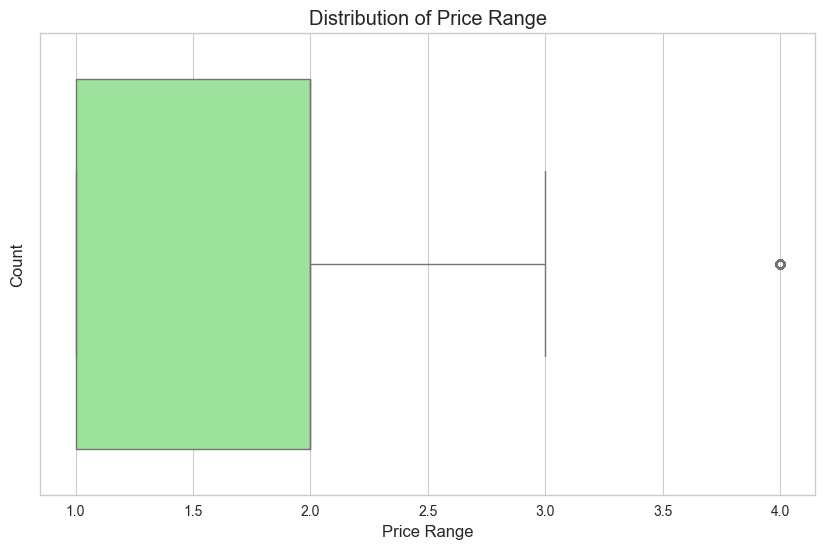

In [66]:
# Boxplot of Price Range
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', data=df, color='lightgreen')
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

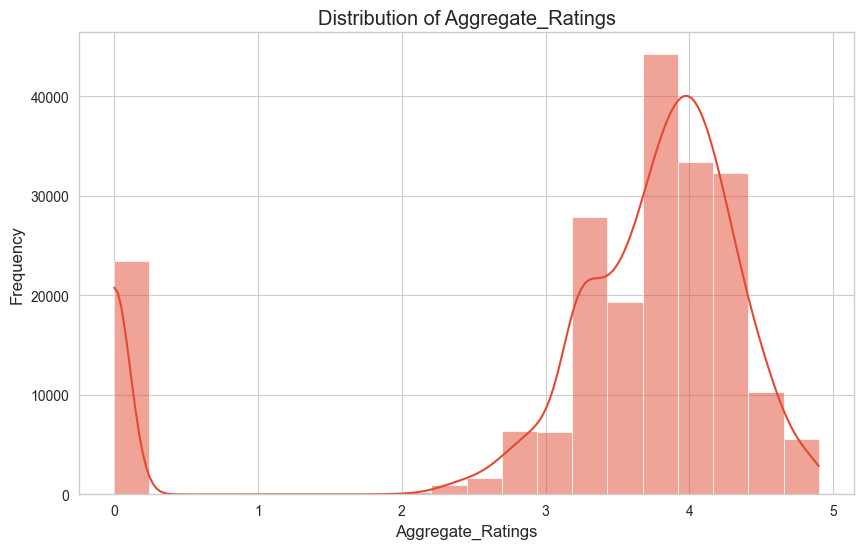

In [67]:

# Visualization of the distribution of 'aggregate_rating'
plt.figure(figsize=(10, 6))
sns.histplot(df['aggregate_rating'], bins=20, kde=True)
plt.title('Distribution of Aggregate_Ratings')
plt.xlabel('Aggregate_Ratings')
plt.ylabel('Frequency')
plt.show()

## Descriptive_stats

In [68]:
numerical_columns = ['average_cost_for_two', 'aggregate_rating', 'votes', 'photo_count']
descriptive_stats = df[numerical_columns].describe()


modes = df[numerical_columns].mode().loc[0]

skewness = df[numerical_columns].skew()
kurtosis = df[numerical_columns].kurtosis()

# Compiling all the statistics
descriptive_stats.loc['mode'] = modes
descriptive_stats.loc['skew'] = skewness
descriptive_stats.loc['kurtosis'] = kurtosis

# Display the descriptive statistics
print(descriptive_stats)

          average_cost_for_two  aggregate_rating          votes    photo_count
count            211944.000000     211944.000000  211944.000000  211944.000000
mean                595.812229          3.395937     378.001864     256.971224
std                 606.239363          1.283642     925.333370     867.668940
min                   0.000000          0.000000     -18.000000       0.000000
25%                 250.000000          3.300000      16.000000       3.000000
50%                 400.000000          3.800000     100.000000      18.000000
75%                 700.000000          4.100000     362.000000     128.000000
max               30000.000000          4.900000   42539.000000   17702.000000
mode                300.000000          0.000000       0.000000       0.000000
skew                  5.491744         -1.911960      10.989821       8.134456
kurtosis            112.761405          2.550176     301.484417      93.576715


In [69]:
# Ensure cities are correctly categorized - this may involve cleaning the city names
df['city'] = df['city'].str.strip()  # Remove any leading/trailing whitespace


## Regional Analysis

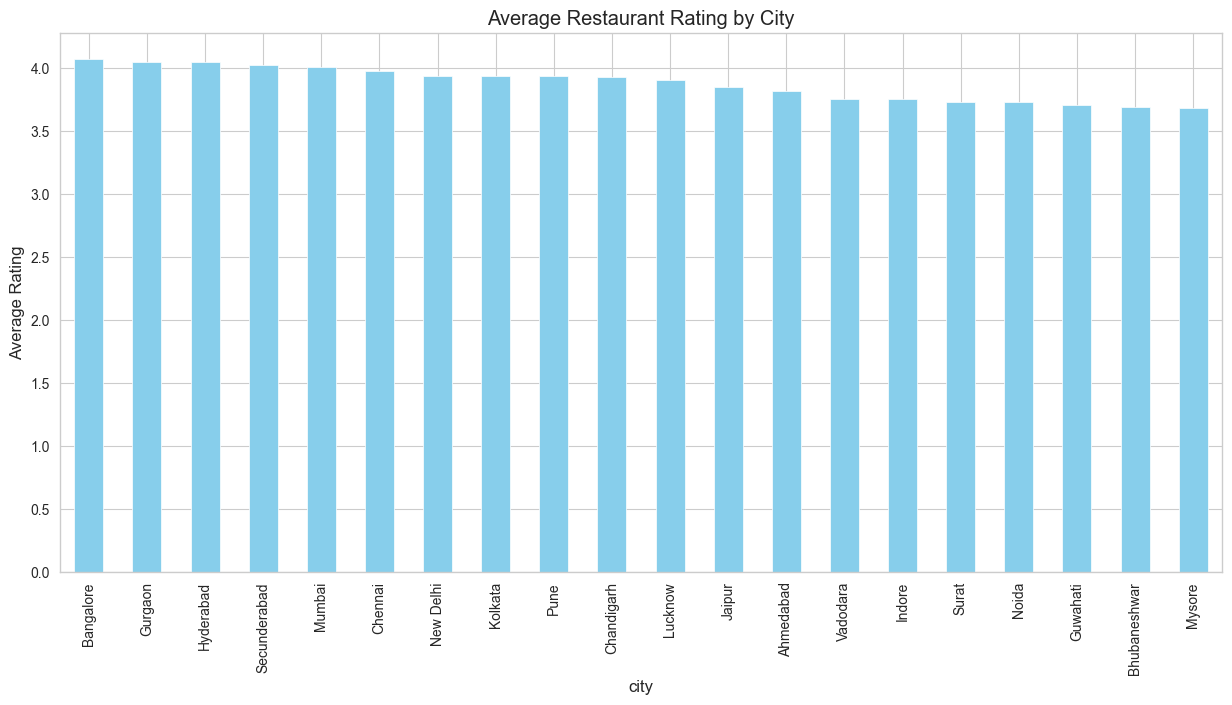

In [70]:
# Average rating by city
city_ratings = df.groupby('city')['aggregate_rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(15, 7))
city_ratings[:20].plot(kind='bar', color='skyblue')  # Top 20 cities
plt.title('Average Restaurant Rating by City')
plt.ylabel('Average Rating')
plt.show()


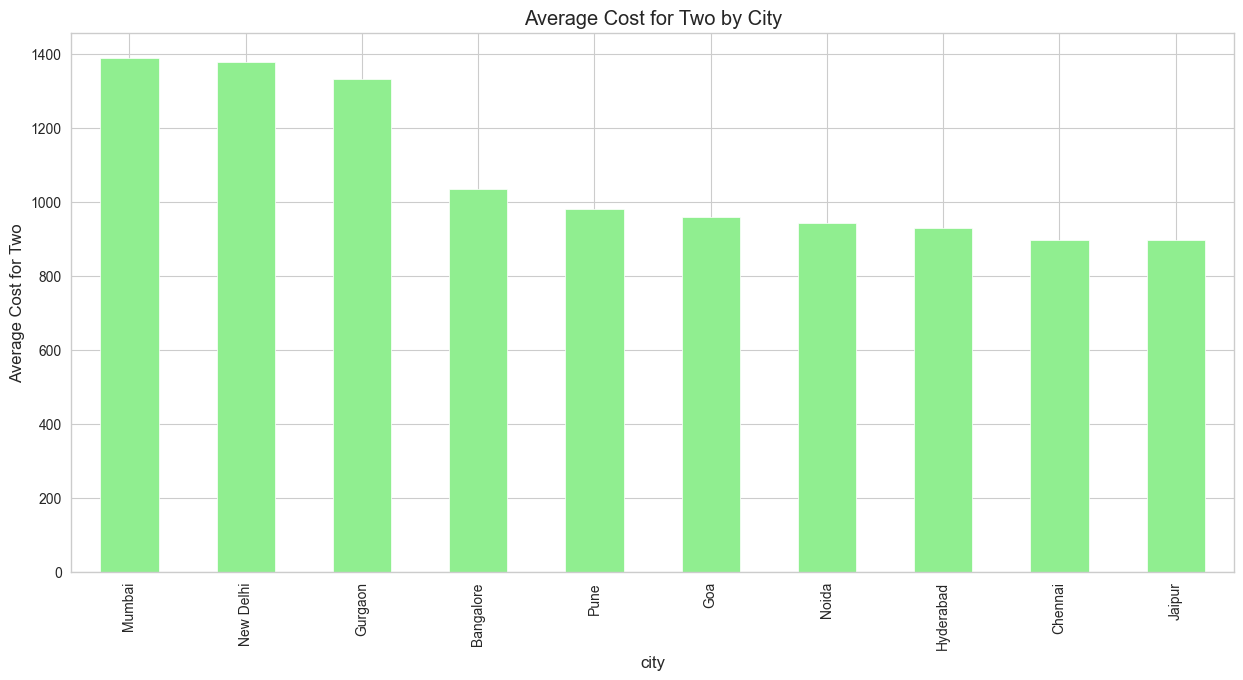

In [71]:
# Average cost for two person by city
city_costs = df.groupby('city')['average_cost_for_two'].mean().sort_values(ascending=False)
plt.figure(figsize=(15, 7))
city_costs[:10].plot(kind='bar', color='lightgreen')
plt.title('Average Cost for Two by City')
plt.ylabel('Average Cost for Two')
plt.show()

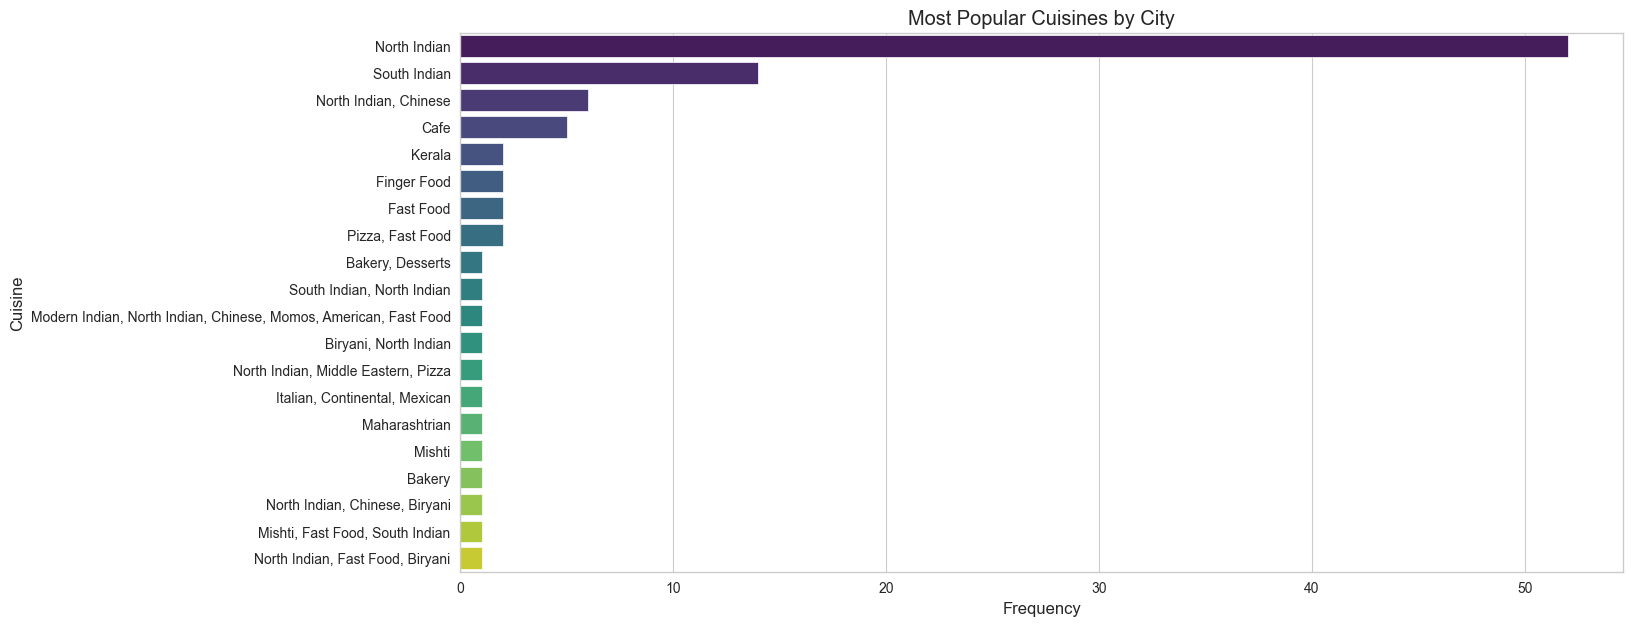

In [72]:
cuisine_by_city = df.groupby('city')['cuisines'].apply(lambda x: x.mode()[0])
plt.figure(figsize=(15, 7))
sns.countplot(y=cuisine_by_city, order=cuisine_by_city.value_counts().index[:20], palette='viridis')
plt.title('Most Popular Cuisines by City')
plt.xlabel('Frequency')
plt.ylabel('Cuisine')
plt.show()

- Ratings: Are certain cities more critical than others? A higher average rating could indicate a competitive market where restaurants strive for higher quality.

- Cost: Does the average cost for two vary significantly between cities? This might reflect the economic diversity or cost of living differences across regions.
- Cuisines: Are some cuisines more dominant in certain regions? This could reflect cultural preferences or the presence of certain demographic groups.
- Delivery and Takeaway Trends: Especially post-pandemic, are these services more prevalent in certain areas?

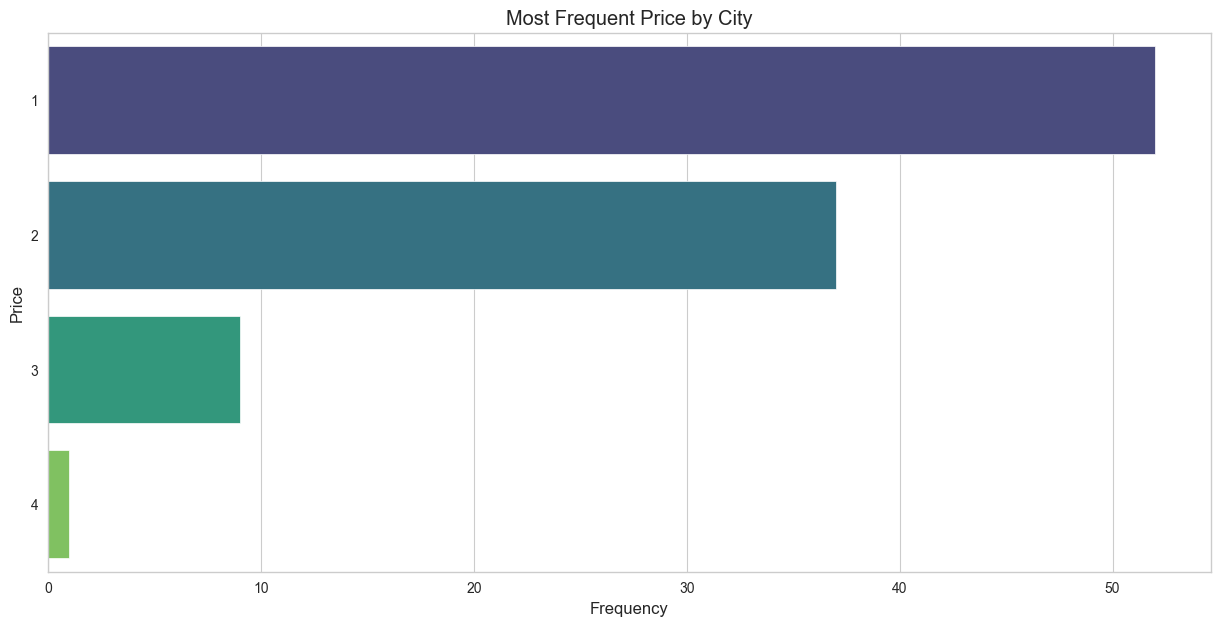

In [73]:
# price range distribution by city ca

price_by_city = df.groupby('city')['price_range'].apply(lambda x: x.mode()[0])
plt.figure(figsize=(15, 7))
sns.countplot(y=price_by_city, order=price_by_city.value_counts().index[:20], palette='viridis')
plt.title('Most Frequent Price by City')
plt.xlabel('Frequency')
plt.ylabel('Price')
plt.show()

In [74]:
# Group by region and calculate relevant statistics
regional_stats = df.groupby('city').agg({
    'cuisines': lambda x: x.value_counts().index[0],  # Most common cuisine
    'average_cost_for_two': 'mean',
    'aggregate_rating': 'mean',
    'photo_count': 'mean',  # You can use other metrics like 'sum' or 'median' based on your analysis needs
    'votes': 'mean'
}).reset_index()


In [75]:
# Calculate the number of unique cuisines per city
unique_cuisines = df.groupby('city')['cuisines'].nunique().sort_values(ascending=False).reset_index(name='unique_cuisines')
unique_cuisines

,city,unique_cuisines
0,Mumbai,901
1,Bangalore,899
2,Pune,804
3,New Delhi,695
4,Chennai,679
...,...,...
94,Howrah,39
95,Udupi,34
96,Neemrana,22
97,Greater Noida,19


In [76]:
df['highlights'].head(3)

0    ['Lunch', 'Takeaway Available', 'Credit Card',...
1    ['Delivery', 'No Alcohol Available', 'Dinner',...
2    ['No Alcohol Available', 'Dinner', 'Takeaway A...
Name: highlights, dtype: object

In [77]:
# Assuming 'highlights' is a list of features separated by a delimiter, say a comma
df['highlights'] = df['highlights'].apply(lambda x: x.split(','))
df_exploded = df.explode('highlights')

# Get the top highlights by region
top_highlights_by_city = df_exploded.groupby('city')['highlights'].value_counts().groupby(level=0).head(3).reset_index(name='count')


In [78]:
df_exploded['highlights']

0                              ['Lunch'
0                  'Takeaway Available'
0                         'Credit Card'
0                              'Dinner'
0                                'Cash'
                      ...              
211943                          'Lunch'
211943                       'Delivery'
211943                    'Credit Card'
211943                 'Indoor Seating'
211943     'Digital Payments Accepted']
Name: highlights, Length: 1986372, dtype: object

In [85]:
top_highlights_by_city

,city,highlights,count
0,Agra,'Takeaway Available',1989
1,Agra,'Cash',1903
2,Agra,'Indoor Seating',1598
3,Ahmedabad,'Takeaway Available',2656
4,Ahmedabad,'Cash',2630
...,...,...,...
292,Vizag,'Takeaway Available',1524
293,Vizag,'Indoor Seating',1443
294,Zirakpur,'Cash',205
295,Zirakpur,'Takeaway Available',201


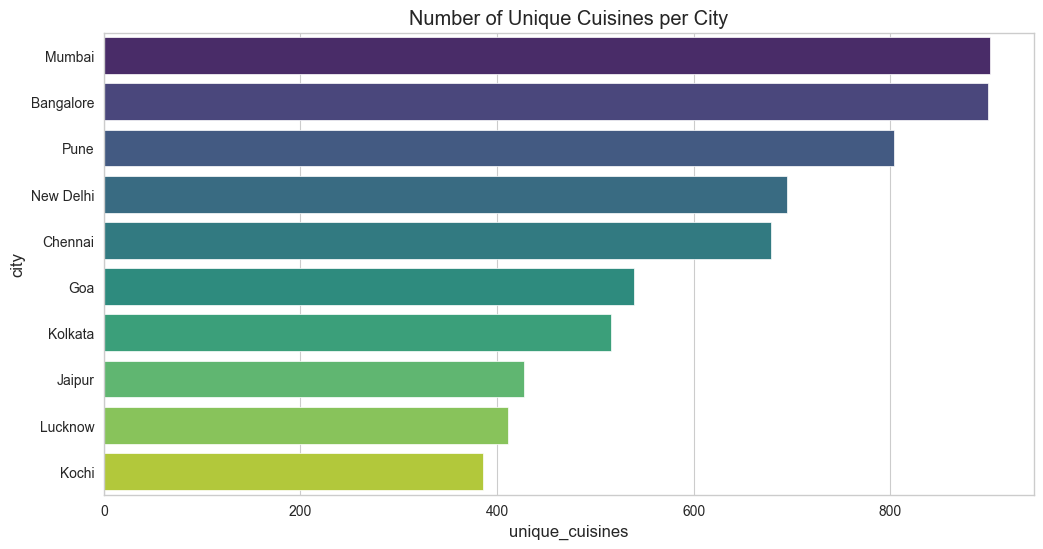

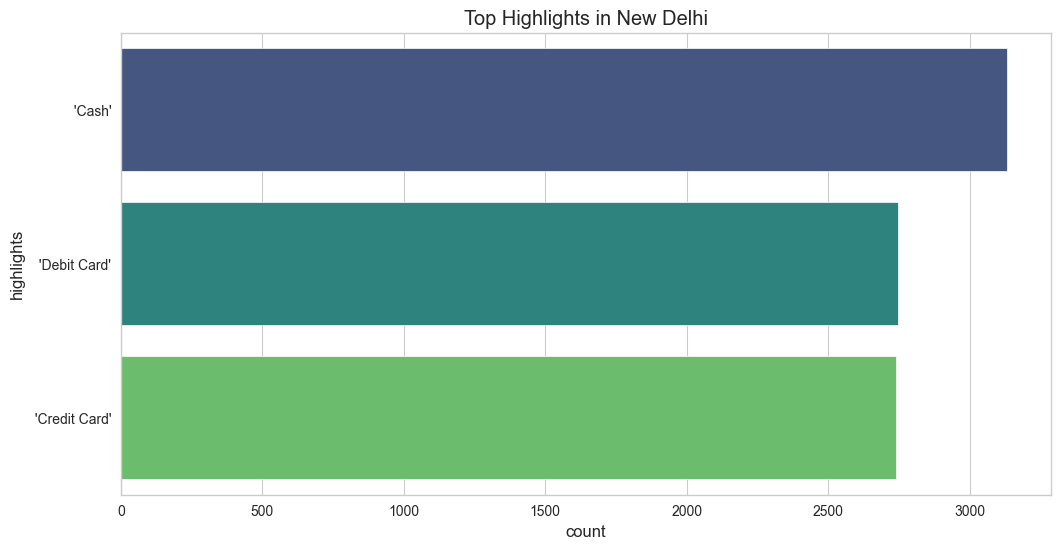

In [80]:
# Example: Plot the number of unique cuisines per city
plt.figure(figsize=(12, 6))
sns.barplot(x='unique_cuisines', y='city', data=unique_cuisines.head(10), palette='viridis')
plt.title('Number of Unique Cuisines per City')
plt.show()

# Example: Plot the top highlights in a specific city
plt.figure(figsize=(12, 6))
city_highlights = top_highlights_by_city[top_highlights_by_city['city'] == 'New Delhi']
sns.barplot(x='count', y='highlights', data=city_highlights, palette='viridis')
plt.title('Top Highlights in New Delhi')
plt.show()


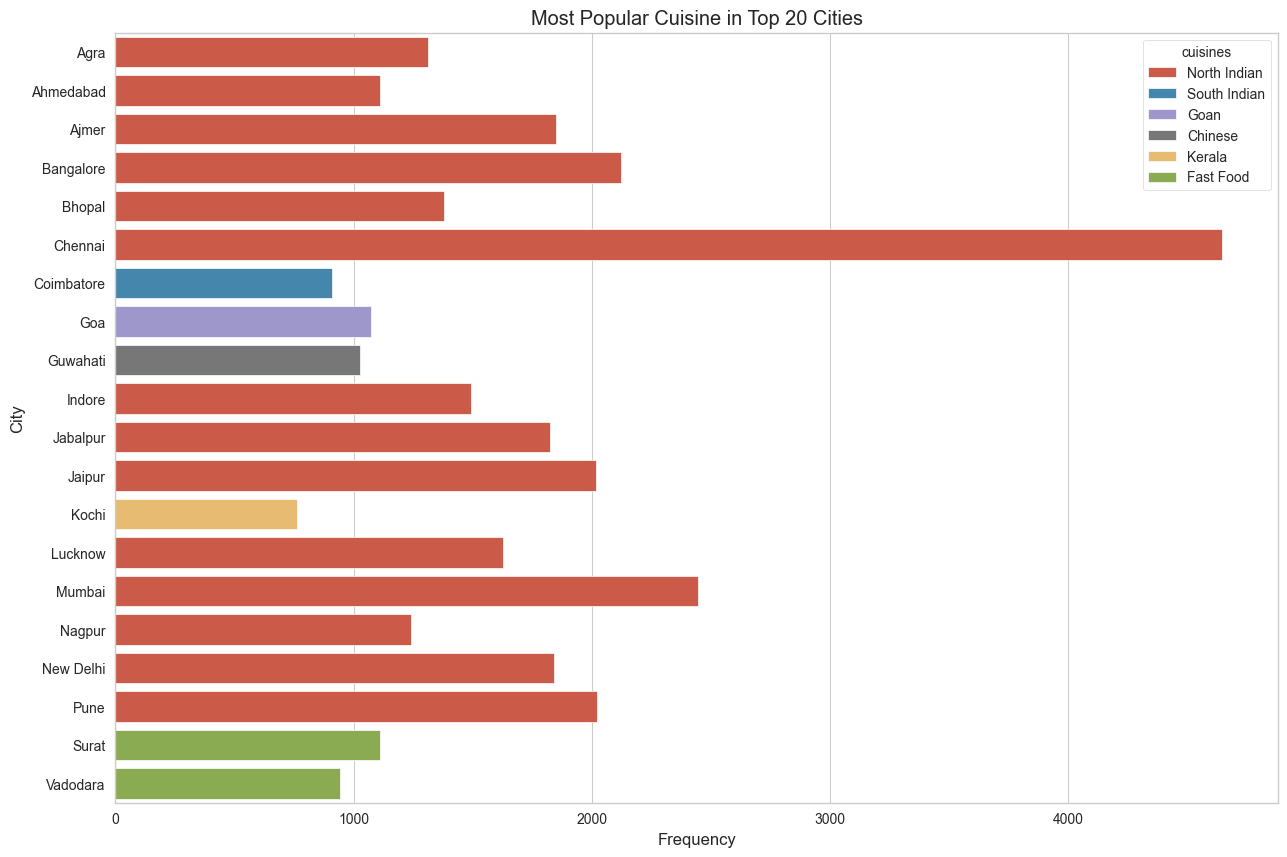

In [81]:
df['cuisines'] = df['cuisines'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)

# Explode 'cuisines' so each cuisine is in its own row
cuisines_exploded = df.explode('cuisines')

# Group by city or region and cuisine to get counts
cuisine_popularity = cuisines_exploded.groupby(['city', 'cuisines']).size().reset_index(name='counts')

# Now, for each city, find the most popular cuisine
most_popular_cuisine_by_city = cuisine_popularity.loc[cuisine_popularity.groupby('city')['counts'].idxmax()]

# Plotting the most popular cuisine in each city (top 20 cities for brevity)
top_cities = df['city'].value_counts().index[:20]
plt.figure(figsize=(15, 10))
sns.barplot(x='counts', y='city', hue='cuisines', data=most_popular_cuisine_by_city[most_popular_cuisine_by_city['city'].isin(top_cities)], dodge=False)
plt.title('Most Popular Cuisine in Top 20 Cities')
plt.xlabel('Frequency')
plt.ylabel('City')
plt.show()

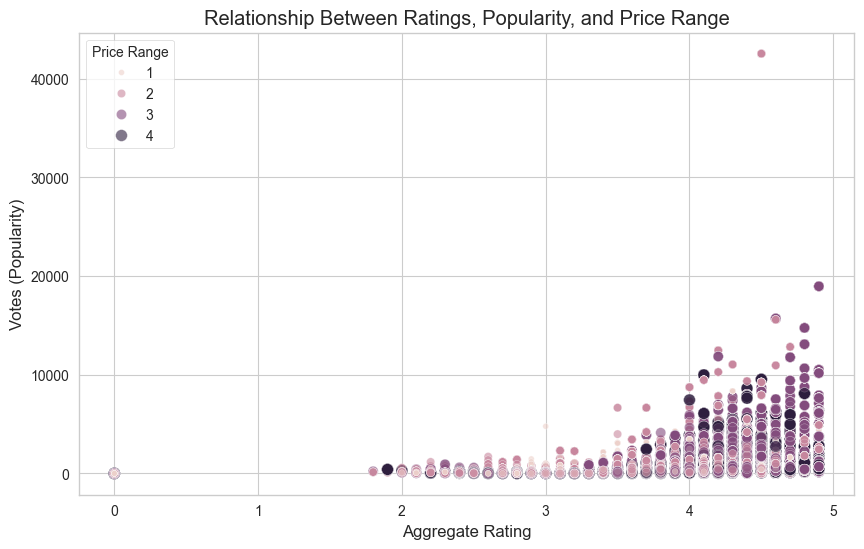

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='aggregate_rating', y='votes', size='price_range', hue='price_range', data=df, alpha=0.6)
plt.title('Relationship Between Ratings, Popularity, and Price Range')
plt.xlabel('Aggregate Rating')
plt.ylabel('Votes (Popularity)')
plt.legend(title='Price Range')
plt.show()

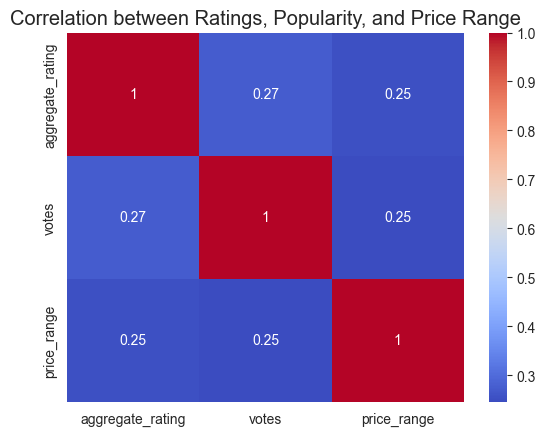

In [83]:
selected_columns = df[['aggregate_rating', 'votes', 'price_range']]
correlation_matrix = selected_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Ratings, Popularity, and Price Range')
plt.show()

not corelated to each othe 


## Competitive Analysis

In [86]:
price_distribution = df.groupby(['city', 'price_range'])['name'].count().reset_index(name='count')

In [87]:
price_distribution

,city,price_range,count
0,Agra,1,1035
1,Agra,2,898
2,Agra,3,390
3,Agra,4,299
4,Ahmedabad,1,666
...,...,...,...
375,Vizag,4,99
376,Zirakpur,1,108
377,Zirakpur,2,89
378,Zirakpur,3,42
